<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Consultorio_del_doctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema de lineas de espera

Se desea encontrar el número de pacientes promedio en el consultorio de un doctor, para ello se realizan observaciones cada 5 minutos y se registraron en la tabla.

|   || 0 | 1 | 2 | 3 | 4 |
|---||---|---|---|---|---|
| 0 || 3 | 5 | 2 | 0 | 0 |
| 1 || 8 | 7 | 0 | 1 | 4 |
| 2 || 5 | 5 | 5 | 5 | 5 |
| 3 || 5 | 0 | 10 | 0 | 0 |
| 4 || 1 | 0 | 0 | 0 | 1 |

In [35]:
import numpy as np
from random import random, randint
from numba import jit
import matplotlib.pyplot as plt
from scipy.stats import norm

#Solución analítica

In [36]:
A = np.array([[3/10, 1/2, 1/5, 0, 0],
              [2/5, 7/20, 0, 1/20, 1/5],
              [0.2, 0.2, 0.2, 0.2, 0.2],
              [1/3, 0, 2/3, 0, 0],
              [0.5, 0, 0, 0, 0.5]])

In [37]:
c = True
n = 1
while c:
  a = np.linalg.matrix_power(A, n)
  aa = np.linalg.matrix_power(A, n+1)
  c = not np.allclose(a, aa)
  n += 1

print(n, '\n')
print(aa)

b = [0, 1, 2, 3, 4]
print()
print(f"El número de pacientes promedio en el consultorio es: {np.dot(b,aa[1])}")

15 

[[0.35476716 0.31042123 0.12195127 0.03991133 0.17294901]
 [0.35476721 0.31042136 0.12195115 0.03991128 0.17294899]
 [0.3547671  0.31042108 0.1219514  0.03991138 0.17294903]
 [0.35476701 0.31042088 0.1219516  0.03991146 0.17294906]
 [0.35476728 0.31042151 0.12195101 0.03991123 0.17294898]]

El número de pacientes promedio en el consultorio es: 1.3658534812298906


#Solución Simulada

In [38]:
@jit(nopython = True)
def consultorio(n = 10**6):
  p = 0
  l = [p]
  n = 10**6
  for k in range(n):
    b = A[p]
    r = random()
    i = 0
    s = b[i]
    while s < r:
      i+=1
      s += b[i]
    p = i
    l.append(p)
  return l

El número de pacientes promedio en el consultorio es: 1.3677246322753678


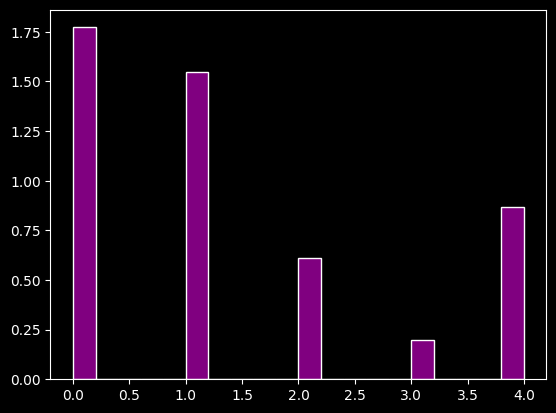

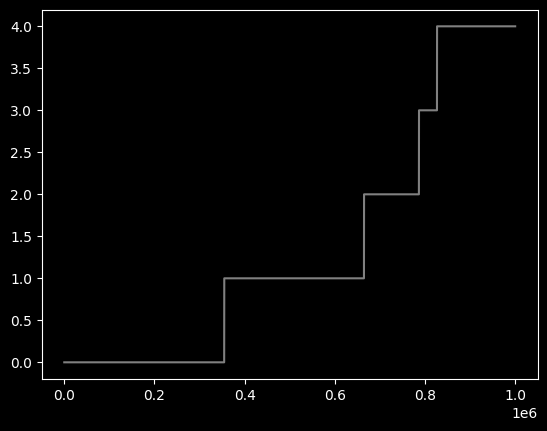

In [39]:
n = 10**8
l = consultorio(n)
print(f"El número de pacientes promedio en el consultorio es: {np.mean(l)}")
plt.style.use('dark_background')
plt.hist(l, bins = 20, density = True, color = 'purple', edgecolor = 'w')
plt.show()

# plt.style.use('dark_background')
plt.plot(np.sort(l), color = 'gray')
plt.show()

In [40]:
med = np.mean(l)
desv = np.std(l, ddof = 1)
z = norm.ppf(0.975)
print(z)
print(f'Un intervalo de confianza al 95% es [{med - z*desv/np.sqrt(n)},{med + z*desv/np.sqrt(n)}]')

1.959963984540054
Un intervalo de confianza al 95% es [1.3674431455900748,1.3680061189606607]
